Visualizing/Analyzing Use Case #1

Bar Chart: Visually represent the top 10 keywords and their corresponding counts

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
from use_case_1 import top_10_keywords, data

In [39]:
# Extracting data for the keyword 'Onrewards' from the details section of the JSON file
onrewards_data = [item for item in data['details'] if item['searchKeyword'] == 'onrewards'][0]['elements']

# Extracting dates from the 'elements' list of the 'onrewards_data' dictionary
dates = [i['date'] for i in onrewards_data]
# Extracting the respective counts from the 'elements' list of the 'onrewards_data' dictionary
counts = [i['count'] for i in onrewards_data]

In [40]:
dates = pd.to_datetime(dates) # Converting the dates to datetime format for easier manipulations

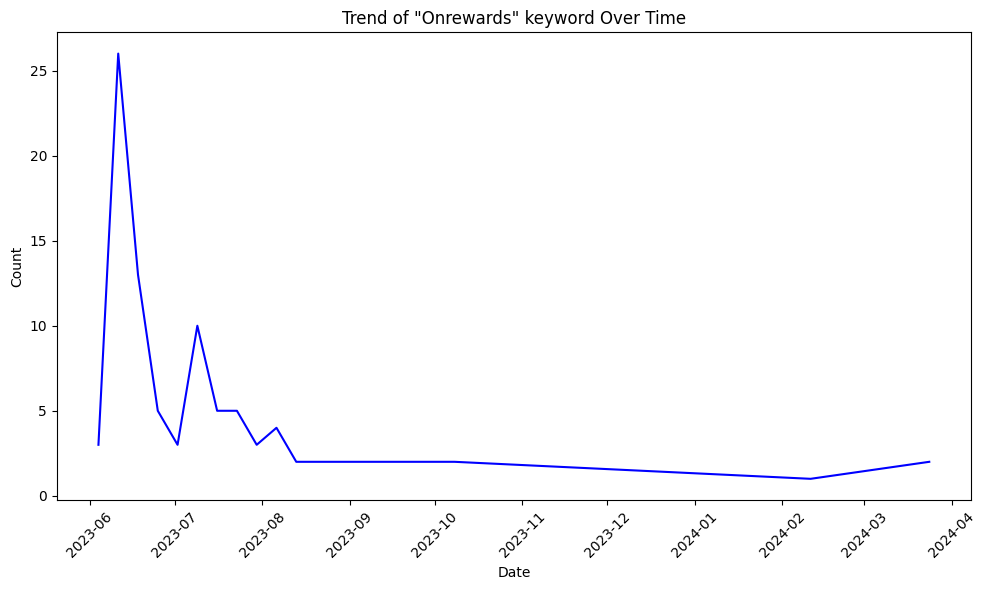

In [23]:
plt.figure(figsize=(10,6))
plt.plot(dates, counts, color='blue')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trend of "Onrewards" keyword Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Chart Showing the Counts of the Top 5 Keywords

In [42]:
# Extracting the top 5 keywords from the 'top_10_keywords' dictionary
top_5_keywords = [keyword_info['searchKeyword'] for keyword_info in top_10_keywords[:5]]

# Creating a dictionary containing the counts for each of the top 5 keywords
top_5_data = {keyword: [item['keywordCount'] for item in data['details'] if item['searchKeyword'] == keyword][0] for keyword in top_5_keywords}

In [43]:
# Creating a list of the data for dataframe creation

keywords_list = top_5_keywords
total_counts_list = list(top_5_data.values())

In [44]:
# Creating a dataframe using the lists of keywords and counts

df_top_5 = pd.DataFrame({'Keywords': keywords_list, 'Counts': total_counts_list})

In [45]:
print(df_top_5)

      Keywords  Counts
0    onrewards      88
1       onward      69
2      rewards      15
3  recognition       9
4     onreward       8


<Figure size 1200x600 with 0 Axes>

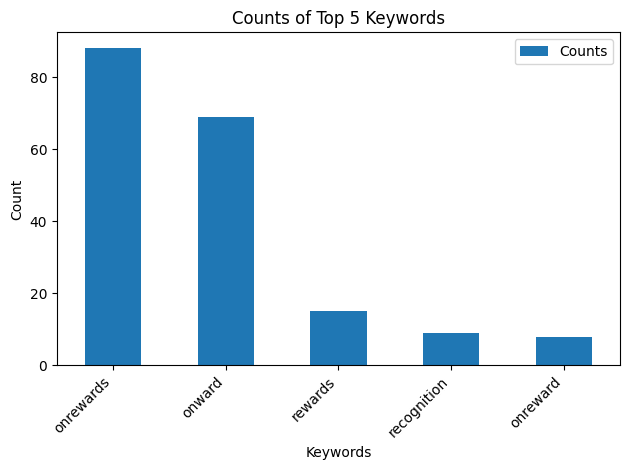

In [75]:
plt.figure(figsize=(12, 6))
ax = df_top_5.plot(kind='bar', stacked=True)
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Counts of Top 5 Keywords')
ax.set_xticklabels(top_5_keywords, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visualizing/Analyzing Use Case #2

Keyword Trends Over the Last 3 Months

In [11]:
from use_case_2 import sorted_keywords, data
from datetime import datetime, timedelta

In [12]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Calculate the date 3 months ago
three_months_ago = datetime.now() - timedelta(days=90)

# Extract keyword data for plotting trends over the last 3 months
keyword_data = {keyword: [] for keyword, count in sorted_keywords[:5]}

for keyword in keyword_data.keys():
    for i in data['details']:
        if i['searchKeyword'] == keyword:
            for j in i['elements']:
                date = datetime.strptime(j['date'], '%Y-%m-%d')
                if date >= three_months_ago:
                    keyword_data[keyword].append((date, j['count']))

In [13]:
print("Extracted Keyword Data:")
for keyword, data_points in keyword_data.items():
    print(f"{keyword}: {data_points}")

Extracted Keyword Data:
onward: [(datetime.datetime(2024, 2, 18, 0, 0), 2), (datetime.datetime(2024, 2, 25, 0, 0), 2), (datetime.datetime(2024, 3, 24, 0, 0), 1), (datetime.datetime(2024, 4, 7, 0, 0), 3)]
recognition: [(datetime.datetime(2024, 2, 18, 0, 0), 2), (datetime.datetime(2024, 4, 7, 0, 0), 1), (datetime.datetime(2024, 3, 10, 0, 0), 1)]
onrewards: [(datetime.datetime(2024, 3, 24, 0, 0), 2)]
rewards: [(datetime.datetime(2024, 3, 17, 0, 0), 1)]
generative ai: [(datetime.datetime(2024, 3, 10, 0, 0), 1)]


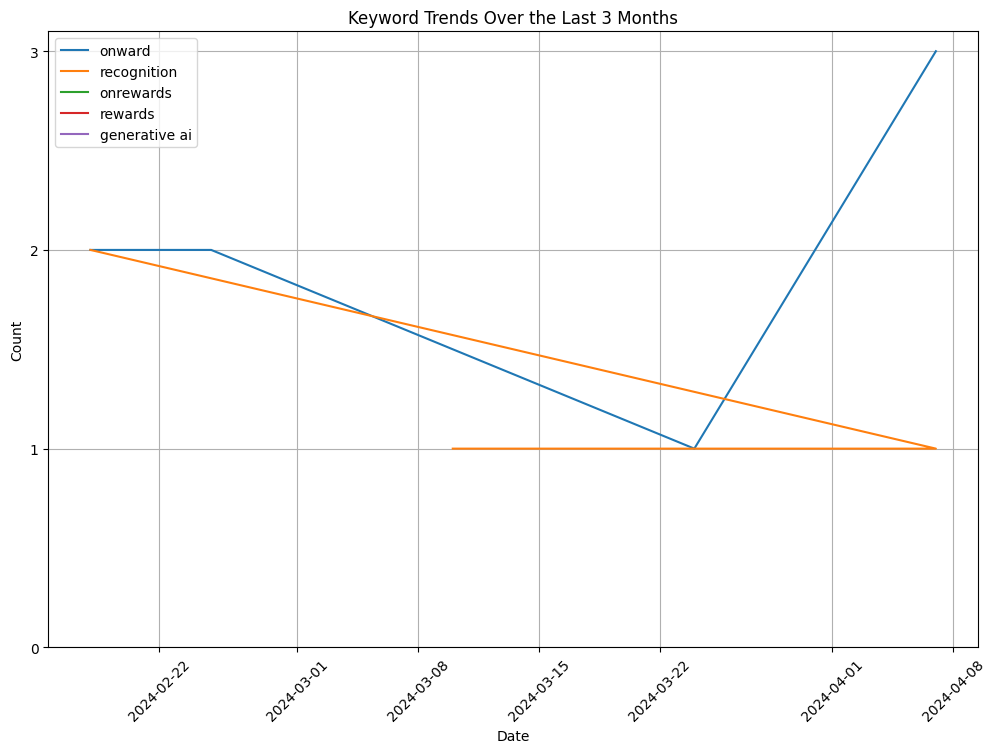

In [14]:
# Plotting keyword trends using a line plot for the last 3 months
plt.figure(figsize=(12, 8))
for keyword, data_points in keyword_data.items():
    x_values = []
    y_values = []
    for date, count in data_points:
        x_values.append(date)
        y_values.append(count)
    plt.plot(x_values, y_values, label=keyword)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Keyword Trends Over the Last 3 Months')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(range(0, max(y_values) + 3))
plt.grid(True)
plt.show()